# credit score classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Science Pillar\\Desktop\\New folder\\credit score classification\\train.csv")
df.head(1)

C:\Users\Science Pillar\AppData\Local\Temp\ipykernel_2616\3583078858.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\Science Pillar\\Desktop\\New folder\\credit score classification\\train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df=df.drop(["ID","Customer_ID","Name","Num_Bank_Accounts","Num_Credit_Card"],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   SSN                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [6]:
df["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [7]:
df=df.drop("Month" , axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   SSN                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Type_of_Loan              88592 non-null   object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [9]:
df["SSN"].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [10]:
df=df.drop("SSN" , axis=1)

In [11]:
df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [12]:
df[df["Occupation"]=="_______"]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,28_,_______,34847.84,3037.986667,6,1,Credit-Builder Loan,3,4,5.42,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,34,_______,143162.64,12187.220000,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,34,_______,143162.64,NaN,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,34,_______,143162.64,12187.220000,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,55,_______,30689.89,2612.490833,4,1,Not Specified,5,6,-3.01,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,37,_______,139664.96,11777.746667,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,18.39,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,38,_______,15319.65,1460.637500,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,-500,_______,22620.79,1722.065833,9,0_,NaN,25,NaN,5.31,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,48,_______,22620.79,NaN,9,0,NaN,27,15,5.31,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [13]:
#fill null values randomly with one of amounts
df['Occupation'] = df['Occupation'].replace('_______', np.nan)
df['Occupation'] = df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [14]:
df["Occupation"].value_counts()

Writer           12947
Lawyer            6575
Architect         6355
Engineer          6350
Scientist         6299
Mechanic          6291
Accountant        6271
Developer         6235
Media_Manager     6232
Teacher           6215
Entrepreneur      6174
Doctor            6087
Journalist        6085
Manager           5973
Musician          5911
Name: Occupation, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Type_of_Loan              88592 non-null   object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [16]:
df["Annual_Income"].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [17]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")

In [18]:
df["Annual_Income"].value_counts()

17816.75      16
22434.16      16
40341.16      16
17273.83      16
109945.32     16
              ..
17079092.0     1
1910572.0      1
20179076.0     1
7980216.0      1
8299495.0      1
Name: Annual_Income, Length: 13487, dtype: int64

In [19]:
df["Annual_Income"]=df["Annual_Income"].astype("float")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  object 
 6   Type_of_Loan              88592 non-null   object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null   object 
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [21]:
df["Age"].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [22]:
df["Age"]=df["Age"].str.replace("_","")

In [23]:
df["Age"]=df["Age"].astype("int")

<AxesSubplot:xlabel='Age', ylabel='Density'>

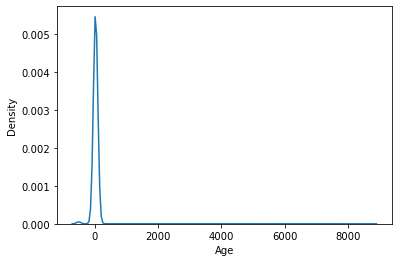

In [24]:
sns.kdeplot(df["Age"])

In [25]:
outliers=df[df["Age"]>85].index

In [26]:
df=df.drop(outliers , axis=0)

In [27]:
df["Age"].value_counts()

 38     2994
 28     2968
 31     2955
 26     2945
 32     2884
 36     2868
 35     2866
 25     2861
 27     2859
 39     2846
 34     2837
 44     2824
 19     2793
 22     2785
 41     2785
 20     2744
 37     2742
 29     2735
 43     2734
 30     2727
 21     2716
 24     2714
 23     2654
 45     2642
 40     2609
 42     2577
 33     2543
 18     2385
 46     1621
 15     1574
 17     1502
 16     1455
 48     1385
 49     1375
 55     1366
 52     1356
 53     1354
 54     1311
 51     1291
 50     1273
 47     1227
 14     1175
-500     886
 56      362
Name: Age, dtype: int64

In [28]:
outlier=df[df["Age"]==-500].index

In [29]:
df=df.drop(outlier , axis=0)

<AxesSubplot:xlabel='Age', ylabel='Density'>

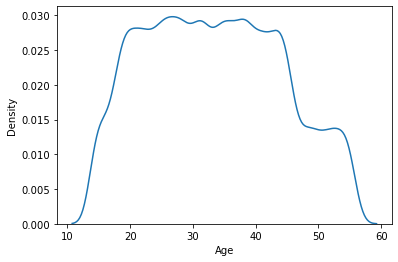

In [30]:
sns.kdeplot(df["Age"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97219 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97219 non-null  int32  
 1   Occupation                97219 non-null  object 
 2   Annual_Income             97219 non-null  float64
 3   Monthly_Inhand_Salary     82623 non-null  float64
 4   Interest_Rate             97219 non-null  int64  
 5   Num_of_Loan               97219 non-null  object 
 6   Type_of_Loan              86145 non-null  object 
 7   Delay_from_due_date       97219 non-null  int64  
 8   Num_of_Delayed_Payment    90395 non-null  object 
 9   Changed_Credit_Limit      97219 non-null  object 
 10  Num_Credit_Inquiries      95313 non-null  float64
 11  Credit_Mix                97219 non-null  object 
 12  Outstanding_Debt          97219 non-null  object 
 13  Credit_Utilization_Ratio  97219 non-null  float64
 14  Credit

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

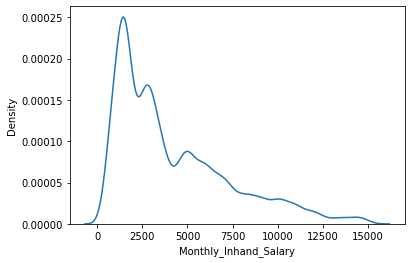

In [32]:
sns.kdeplot(df["Monthly_Inhand_Salary"])

In [33]:
df["Monthly_Inhand_Salary"].isnull().sum()

14596

In [34]:
df["Monthly_Inhand_Salary"].mean()

4195.120334214863

In [35]:
df["Monthly_Inhand_Salary"].mode()

0    2295.058333
1    6082.187500
2    6769.130000
Name: Monthly_Inhand_Salary, dtype: float64

In [36]:
df["Monthly_Inhand_Salary"].median()

3096.1541666666667

In [37]:
df["Monthly_Inhand_Salary"].describe()

count    82623.000000
mean      4195.120334
std       3182.962420
min        303.645417
25%       1626.594167
50%       3096.154167
75%       5957.715000
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [38]:
df["Monthly_Inhand_Salary"]=df["Monthly_Inhand_Salary"].fillna(df["Monthly_Inhand_Salary"].std())

In [39]:
df["Monthly_Inhand_Salary"].describe()

count    97219.000000
mean      4043.159741
std       2956.500249
min        303.645417
25%       1794.304167
50%       3182.962420
75%       5373.571667
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

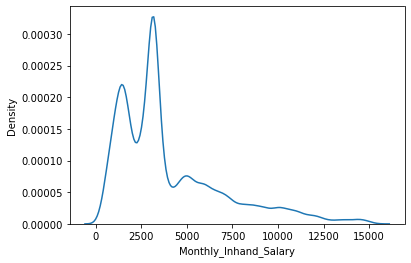

In [40]:
sns.kdeplot(df["Monthly_Inhand_Salary"])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97219 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97219 non-null  int32  
 1   Occupation                97219 non-null  object 
 2   Annual_Income             97219 non-null  float64
 3   Monthly_Inhand_Salary     97219 non-null  float64
 4   Interest_Rate             97219 non-null  int64  
 5   Num_of_Loan               97219 non-null  object 
 6   Type_of_Loan              86145 non-null  object 
 7   Delay_from_due_date       97219 non-null  int64  
 8   Num_of_Delayed_Payment    90395 non-null  object 
 9   Changed_Credit_Limit      97219 non-null  object 
 10  Num_Credit_Inquiries      95313 non-null  float64
 11  Credit_Mix                97219 non-null  object 
 12  Outstanding_Debt          97219 non-null  object 
 13  Credit_Utilization_Ratio  97219 non-null  float64
 14  Credit

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

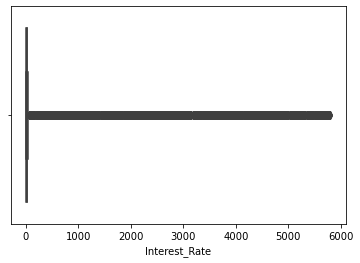

In [42]:
sns.boxplot(df["Interest_Rate"])

In [43]:
df["Interest_Rate"].value_counts()

8       4867
5       4820
6       4595
10      4418
12      4408
        ... 
4995       1
1899       1
5762       1
4372       1
5729       1
Name: Interest_Rate, Length: 1708, dtype: int64

In [44]:
outlir_rate=df[df["Interest_Rate"]>40].index

In [45]:
df=df.drop(outlir_rate , axis=0)

In [46]:
df["Interest_Rate"].value_counts()

8     4867
5     4820
6     4595
10    4418
12    4408
9     4377
7     4355
11    4300
18    3996
15    3874
20    3829
17    3706
16    3621
19    3555
3     2671
1     2614
4     2510
2     2405
13    2317
14    2177
32    1689
22    1675
30    1656
24    1634
23    1633
29    1623
27    1564
28    1554
25    1519
21    1517
34    1463
26    1455
33    1426
31    1419
Name: Interest_Rate, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

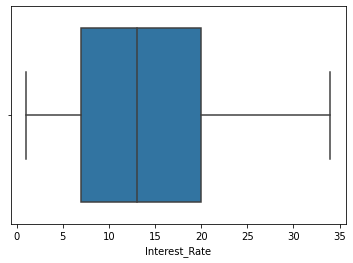

In [47]:
sns.boxplot(df["Interest_Rate"])

In [48]:
df["Num_of_Loan"].value_counts()

3        13690
2        13573
4        13349
0         9888
1         9615
         ...  
630_         1
252          1
745          1
1320_        1
966          1
Name: Num_of_Loan, Length: 414, dtype: int64

In [49]:
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")

In [50]:
df["Num_of_Loan"].value_counts()

3      14364
2      14315
4      14047
0      10415
1      10114
       ...  
241        1
630        1
252        1
745        1
966        1
Name: Num_of_Loan, Length: 395, dtype: int64

In [51]:
df["Num_of_Loan"]=df["Num_of_Loan"].astype("int")

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Density'>

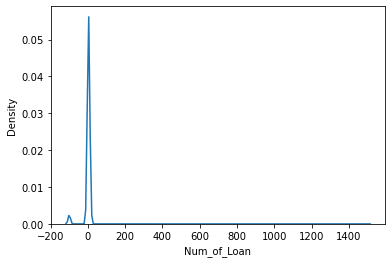

In [52]:
sns.kdeplot(df["Num_of_Loan"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Loan'>

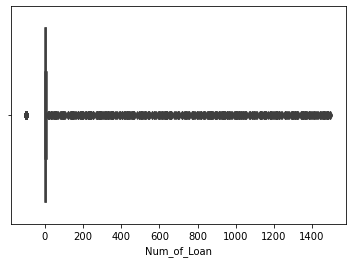

In [53]:
sns.boxplot(df["Num_of_Loan"])

In [54]:
out_lioer=df[df["Num_of_Loan"]>30].index

In [55]:
df=df.drop(out_lioer , axis=0)

In [56]:
df["Num_of_Loan"].value_counts()

 3      14364
 2      14315
 4      14047
 0      10415
 1      10114
 6       7439
 7       6989
 5       6852
-100     3689
 9       3540
 8       3034
 23         2
 29         1
 19         1
 17         1
 18         1
Name: Num_of_Loan, dtype: int64

In [57]:
df["Num_of_Loan"]=df["Num_of_Loan"].replace(-100,10)

In [58]:
df["Num_of_Loan"].value_counts()

3     14364
2     14315
4     14047
0     10415
1     10114
6      7439
7      6989
5      6852
10     3689
9      3540
8      3034
23        2
29        1
19        1
17        1
18        1
Name: Num_of_Loan, dtype: int64

In [59]:
df["Num_of_Loan"]=df["Num_of_Loan"].astype("category")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94804 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       94804 non-null  int32   
 1   Occupation                94804 non-null  object  
 2   Annual_Income             94804 non-null  float64 
 3   Monthly_Inhand_Salary     94804 non-null  float64 
 4   Interest_Rate             94804 non-null  int64   
 5   Num_of_Loan               94804 non-null  category
 6   Type_of_Loan              83994 non-null  object  
 7   Delay_from_due_date       94804 non-null  int64   
 8   Num_of_Delayed_Payment    88124 non-null  object  
 9   Changed_Credit_Limit      94804 non-null  object  
 10  Num_Credit_Inquiries      92949 non-null  float64 
 11  Credit_Mix                94804 non-null  object  
 12  Outstanding_Debt          94804 non-null  object  
 13  Credit_Utilization_Ratio  94804 non-null  floa

In [61]:
df["Type_of_Loan"].nunique()

6260

In [62]:
df=df.drop("Type_of_Loan" , axis=1)

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

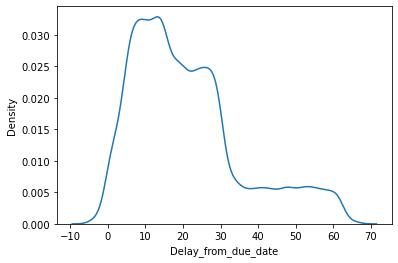

In [63]:
sns.kdeplot(df["Delay_from_due_date"])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

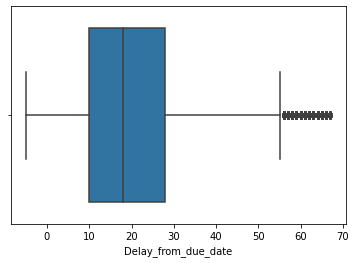

In [64]:
sns.boxplot(df["Delay_from_due_date"])

In [65]:
df[df["Delay_from_due_date"]<0]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23,Scientist,19114.12,3182.962420,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
49,34,Lawyer,131313.40,11242.783333,8,2,-1,2,15.34,4.0,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
74,44,Journalist,31370.80,2825.233333,12,2,-2,0,1.7599999999999998,5.0,Good,421.43,31.046418,26 Years and 7 Months,No,46.616129,140.8206959818371,Low_spent_Medium_value_payments,375.0865082781542,Good
78,45,Journalist,31370.80,2825.233333,12,10,-1,2,5.76,5.0,Good,421.43,22.762202,26 Years and 11 Months,No,46.616129,188.3949004901688,Low_spent_Small_value_payments,337.51230376982244,Good
79,45,Journalist,31370.80,3182.962420,12,2,-2,2,5.76,5.0,_,421.43,37.565053,27 Years and 0 Months,No,46.616129,252.6448271968889,Low_spent_Small_value_payments,273.2623770631024,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99198,35,Mechanic,96047.22,7775.935000,1,1,-2,6,4.75,NaN,Good,1366.21,34.080533,17 Years and 10 Months,No,49.656727,113.12162293292722,!@9#%8,854.81515,Good
99358,44,Manager,19631.26,1724.938333,9,4,-1,4,17.509999999999998,9.0,_,823.21,39.130281,32 Years and 4 Months,No,65.051299,129.02693555689748,Low_spent_Small_value_payments,268.415598,Good
99368,31,Media_Manager,61465.78,5082.148333,11,10,-4,10,3.17,0.0,Good,608.87,26.846460,17 Years and 10 Months,No,31.650737,__10000__,Low_spent_Medium_value_payments,612.047512,Standard
99371,31,Media_Manager,61465.78,5082.148333,11,1,-5,10,3.17,2.0,_,608.87,25.443676,18 Years and 1 Months,No,31.650737,493.1440957854908,Low_spent_Medium_value_payments,263.42,Good


In [66]:
df["Delay_from_due_date"]=df["Delay_from_due_date"].replace(-1,1)
df["Delay_from_due_date"]=df["Delay_from_due_date"].replace(-2,2)
df["Delay_from_due_date"]=df["Delay_from_due_date"].replace(-3,3)
df["Delay_from_due_date"]=df["Delay_from_due_date"].replace(-4,4)
df["Delay_from_due_date"]=df["Delay_from_due_date"].replace(-5,5)

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

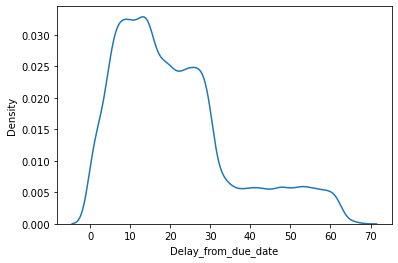

In [67]:
sns.kdeplot(df["Delay_from_due_date"])

In [68]:
df[df["Delay_from_due_date"]<0]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94804 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       94804 non-null  int32   
 1   Occupation                94804 non-null  object  
 2   Annual_Income             94804 non-null  float64 
 3   Monthly_Inhand_Salary     94804 non-null  float64 
 4   Interest_Rate             94804 non-null  int64   
 5   Num_of_Loan               94804 non-null  category
 6   Delay_from_due_date       94804 non-null  int64   
 7   Num_of_Delayed_Payment    88124 non-null  object  
 8   Changed_Credit_Limit      94804 non-null  object  
 9   Num_Credit_Inquiries      92949 non-null  float64 
 10  Credit_Mix                94804 non-null  object  
 11  Outstanding_Debt          94804 non-null  object  
 12  Credit_Utilization_Ratio  94804 non-null  float64 
 13  Credit_History_Age        86233 non-null  obje

In [70]:
df["Num_of_Delayed_Payment"].value_counts()

19      5039
17      5009
16      4881
10      4870
15      4827
        ... 
1530       1
1502       1
4075       1
3845       1
2047       1
Name: Num_of_Delayed_Payment, Length: 709, dtype: int64

In [71]:
df["Num_of_Delayed_Payment"].isnull().sum()

6680

In [72]:
df["Num_of_Delayed_Payment"].describe()

count     88124
unique      709
top          19
freq       5039
Name: Num_of_Delayed_Payment, dtype: object

In [73]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")

In [74]:
df["Num_of_Delayed_Payment"].median()

14.0

In [75]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].fillna(df["Num_of_Delayed_Payment"].median())

In [76]:
df["Num_of_Delayed_Payment"].describe()

count     94804.0
unique      672.0
top          14.0
freq       6680.0
Name: Num_of_Delayed_Payment, dtype: float64

In [77]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype("int")

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

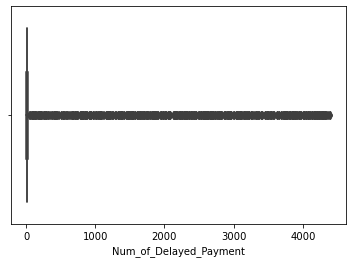

In [78]:
sns.boxplot(df["Num_of_Delayed_Payment"])

In [79]:
outlier_delay=df[df["Num_of_Delayed_Payment"]>50].index

In [80]:
df=df.drop(outlier_delay , axis=0)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

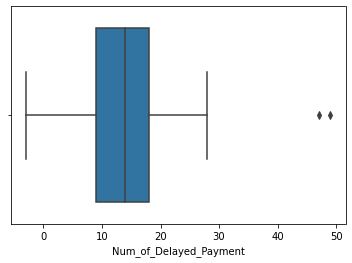

In [81]:
sns.boxplot(df["Num_of_Delayed_Payment"])

In [82]:
out_delay=df[df["Num_of_Delayed_Payment"]<0].index

In [83]:
df=df.drop(out_delay , axis=0)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93496 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       93496 non-null  int32   
 1   Occupation                93496 non-null  object  
 2   Annual_Income             93496 non-null  float64 
 3   Monthly_Inhand_Salary     93496 non-null  float64 
 4   Interest_Rate             93496 non-null  int64   
 5   Num_of_Loan               93496 non-null  category
 6   Delay_from_due_date       93496 non-null  int64   
 7   Num_of_Delayed_Payment    93496 non-null  int32   
 8   Changed_Credit_Limit      93496 non-null  object  
 9   Num_Credit_Inquiries      91665 non-null  float64 
 10  Credit_Mix                93496 non-null  object  
 11  Outstanding_Debt          93496 non-null  object  
 12  Credit_Utilization_Ratio  93496 non-null  float64 
 13  Credit_History_Age        85039 non-null  obje

In [85]:
df["Changed_Credit_Limit"].nunique()

4347

In [86]:
df=df.drop("Changed_Credit_Limit" , axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93496 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       93496 non-null  int32   
 1   Occupation                93496 non-null  object  
 2   Annual_Income             93496 non-null  float64 
 3   Monthly_Inhand_Salary     93496 non-null  float64 
 4   Interest_Rate             93496 non-null  int64   
 5   Num_of_Loan               93496 non-null  category
 6   Delay_from_due_date       93496 non-null  int64   
 7   Num_of_Delayed_Payment    93496 non-null  int32   
 8   Num_Credit_Inquiries      91665 non-null  float64 
 9   Credit_Mix                93496 non-null  object  
 10  Outstanding_Debt          93496 non-null  object  
 11  Credit_Utilization_Ratio  93496 non-null  float64 
 12  Credit_History_Age        85039 non-null  object  
 13  Payment_of_Min_Amount     93496 non-null  obje

<AxesSubplot:xlabel='Num_Credit_Inquiries', ylabel='Density'>

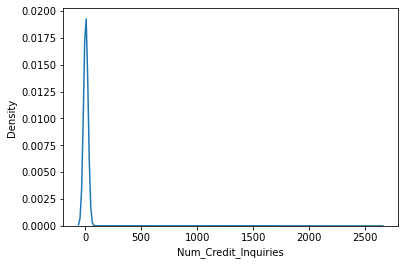

In [88]:
sns.kdeplot(df["Num_Credit_Inquiries"])

In [89]:
df["Num_Credit_Inquiries"].isnull().sum()

1831

In [90]:
df["Num_Credit_Inquiries"].describe()

count    91665.000000
mean        27.906878
std        193.646642
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [91]:
df["Num_Credit_Inquiries"].median()

6.0

In [92]:
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].fillna(df["Num_Credit_Inquiries"].median())

In [93]:
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].astype("int")

In [94]:
df["Num_Credit_Inquiries"].describe()

count    93496.000000
mean        27.477860
std        191.765112
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

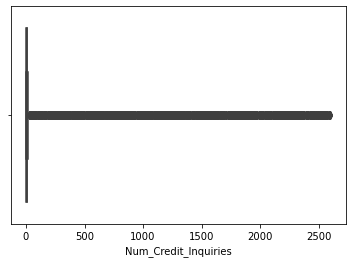

In [95]:
sns.boxplot(df["Num_Credit_Inquiries"])

In [96]:
out_inquiry=df[df["Num_Credit_Inquiries"]>17].index

In [97]:
df=df.drop(out_inquiry , axis=0)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

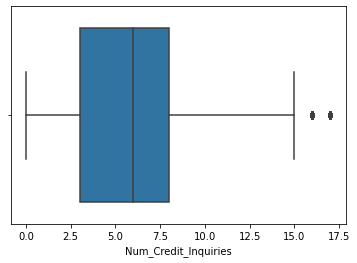

In [98]:
sns.boxplot(df["Num_Credit_Inquiries"])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91939 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       91939 non-null  int32   
 1   Occupation                91939 non-null  object  
 2   Annual_Income             91939 non-null  float64 
 3   Monthly_Inhand_Salary     91939 non-null  float64 
 4   Interest_Rate             91939 non-null  int64   
 5   Num_of_Loan               91939 non-null  category
 6   Delay_from_due_date       91939 non-null  int64   
 7   Num_of_Delayed_Payment    91939 non-null  int32   
 8   Num_Credit_Inquiries      91939 non-null  int32   
 9   Credit_Mix                91939 non-null  object  
 10  Outstanding_Debt          91939 non-null  object  
 11  Credit_Utilization_Ratio  91939 non-null  float64 
 12  Credit_History_Age        83637 non-null  object  
 13  Payment_of_Min_Amount     91939 non-null  obje

In [100]:
df["Credit_Mix"].value_counts()

Standard    33805
Good        21973
_           18564
Bad         17597
Name: Credit_Mix, dtype: int64

In [101]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

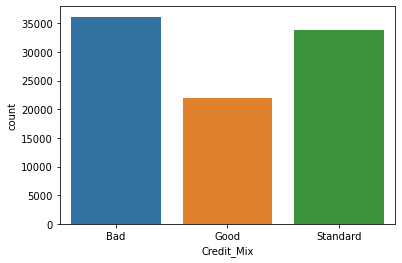

In [102]:
sns.countplot(df['Credit_Mix'])

In [103]:
df["Outstanding_Debt"].value_counts()

1151.7      23
1360.45     21
460.46      19
1109.03     19
1072.42     16
            ..
1571.84_     1
1073.76_     1
889.46_      1
544.82_      1
1673.76_     1
Name: Outstanding_Debt, Length: 13105, dtype: int64

In [104]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_" ,"")

In [105]:
df["Outstanding_Debt"].value_counts()

1151.7     24
1360.45    21
1109.03    20
460.46     20
1408.66    16
           ..
917.0       3
1147.62     3
1226.97     3
1599.96     3
904.93      2
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [106]:
df["Outstanding_Debt"].nunique()

12203

In [107]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype("float")

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Density'>

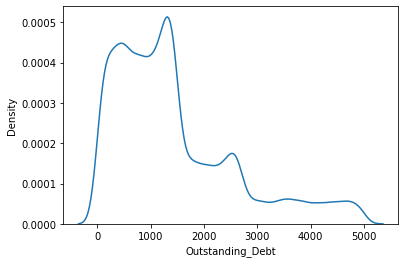

In [108]:
sns.kdeplot(df["Outstanding_Debt"])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91939 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       91939 non-null  int32   
 1   Occupation                91939 non-null  object  
 2   Annual_Income             91939 non-null  float64 
 3   Monthly_Inhand_Salary     91939 non-null  float64 
 4   Interest_Rate             91939 non-null  int64   
 5   Num_of_Loan               91939 non-null  category
 6   Delay_from_due_date       91939 non-null  int64   
 7   Num_of_Delayed_Payment    91939 non-null  int32   
 8   Num_Credit_Inquiries      91939 non-null  int32   
 9   Credit_Mix                91939 non-null  object  
 10  Outstanding_Debt          91939 non-null  float64 
 11  Credit_Utilization_Ratio  91939 non-null  float64 
 12  Credit_History_Age        83637 non-null  object  
 13  Payment_of_Min_Amount     91939 non-null  obje

In [110]:
df["Credit_Utilization_Ratio"].isnull().sum()

0

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Density'>

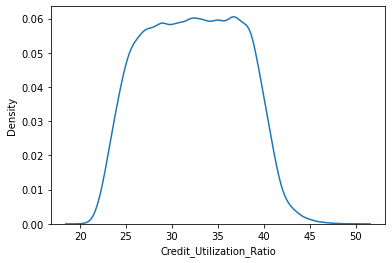

In [111]:
sns.kdeplot(df["Credit_Utilization_Ratio"])

In [112]:
df["Credit_History_Age"].isnull().sum()

8302

In [113]:
df["Credit_History_Age"].describe()

count                      83637
unique                       404
top       17 Years and 11 Months
freq                         411
Name: Credit_History_Age, dtype: object

In [114]:
df["Credit_History_Age"].value_counts()

17 Years and 11 Months    411
17 Years and 9 Months     406
15 Years and 9 Months     404
15 Years and 11 Months    403
19 Years and 3 Months     401
                         ... 
0 Years and 3 Months       18
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      11
0 Years and 1 Months        1
Name: Credit_History_Age, Length: 404, dtype: int64

In [115]:
df=df.drop("Credit_History_Age" ,axis=1)

In [116]:
df['Payment_of_Min_Amount'].value_counts()

Yes    48489
No     32419
NM     11031
Name: Payment_of_Min_Amount, dtype: int64

In [117]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [118]:
df['Payment_of_Min_Amount'].value_counts()

Yes    59520
No     32419
Name: Payment_of_Min_Amount, dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91939 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       91939 non-null  int32   
 1   Occupation                91939 non-null  object  
 2   Annual_Income             91939 non-null  float64 
 3   Monthly_Inhand_Salary     91939 non-null  float64 
 4   Interest_Rate             91939 non-null  int64   
 5   Num_of_Loan               91939 non-null  category
 6   Delay_from_due_date       91939 non-null  int64   
 7   Num_of_Delayed_Payment    91939 non-null  int32   
 8   Num_Credit_Inquiries      91939 non-null  int32   
 9   Credit_Mix                91939 non-null  object  
 10  Outstanding_Debt          91939 non-null  float64 
 11  Credit_Utilization_Ratio  91939 non-null  float64 
 12  Payment_of_Min_Amount     91939 non-null  object  
 13  Total_EMI_per_month       91939 non-null  floa

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

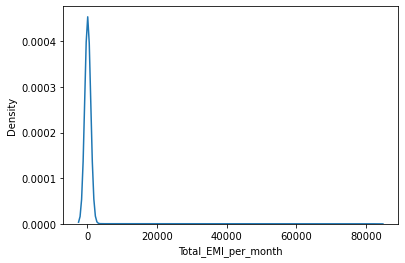

In [120]:
sns.kdeplot(df["Total_EMI_per_month"])

In [121]:
df["Total_EMI_per_month"].value_counts()

0.000000        9700
40.188627          8
62.257042          8
32.891186          8
40.238899          8
                ... 
57736.000000       1
4363.000000        1
13107.000000       1
81171.000000       1
58638.000000       1
Name: Total_EMI_per_month, Length: 14689, dtype: int64

In [122]:
out_emi=df[df["Total_EMI_per_month"]>1000].index

In [123]:
df=df.drop(out_emi , axis=0)

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

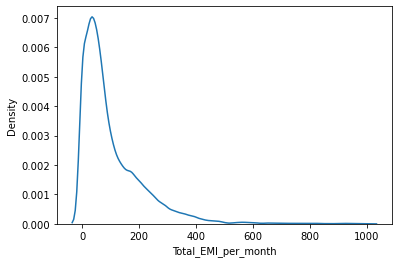

In [124]:
sns.kdeplot(df["Total_EMI_per_month"])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88820 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       88820 non-null  int32   
 1   Occupation                88820 non-null  object  
 2   Annual_Income             88820 non-null  float64 
 3   Monthly_Inhand_Salary     88820 non-null  float64 
 4   Interest_Rate             88820 non-null  int64   
 5   Num_of_Loan               88820 non-null  category
 6   Delay_from_due_date       88820 non-null  int64   
 7   Num_of_Delayed_Payment    88820 non-null  int32   
 8   Num_Credit_Inquiries      88820 non-null  int32   
 9   Credit_Mix                88820 non-null  object  
 10  Outstanding_Debt          88820 non-null  float64 
 11  Credit_Utilization_Ratio  88820 non-null  float64 
 12  Payment_of_Min_Amount     88820 non-null  object  
 13  Total_EMI_per_month       88820 non-null  floa

In [126]:
df["Amount_invested_monthly"].isnull().sum()

3959

In [127]:
df["Amount_invested_monthly"].value_counts()

__10000__             3801
0.0                    150
80.41529543900253        1
98.02625210605623        1
129.36095384373937       1
                      ... 
72.01790379139506        1
39.71642147752549        1
231.83527982441933       1
429.86805415538385       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 80912, dtype: int64

In [128]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("__10000__" ,"")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("0.0","")

C:\Users\Science Pillar\AppData\Local\Temp\ipykernel_2616\2104951990.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("0.0","")


In [129]:
df["Amount_invested_monthly"].value_counts()

                      3951
80.41529543900253        1
102.7709224402651        1
354.3048059593612        1
129.36095384373937       1
                      ... 
72.01790379139506        1
39.71642147752549        1
231.83527982441933       1
429.86805415538385       1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 80911, dtype: int64

In [130]:
df["Amount_invested_monthly"].isnull().sum()

3959

In [131]:
df["Amount_invested_monthly"].unique()

array(['80.41529543900253', '118.28022162236736', '199.4580743910713',
       ..., '54.18595028760385', '251.67258219721603',
       '167.1638651610451'], dtype=object)

In [132]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("''","")

In [133]:
df[df["Amount_invested_monthly"]==""]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,34,Writer,143162.64,3182.962420,8,3,8,7,6,Good,1303.01,26.519815,No,246.992319,,High_spent_Small_value_payments,715.741367403555,Good
23,34,Engineer,143162.64,12187.220000,8,3,8,6,3,Good,1303.01,38.374753,No,246.992319,,High_spent_Small_value_payments,895.494583180492,Standard
28,55,Entrepreneur,30689.89,2612.490833,4,1,5,6,4,Good,632.46,41.154317,No,16.415452,,Low_spent_Large_value_payments,359.37491550776383,Standard
121,30,Scientist,31993.78,2942.148333,7,2,12,14,0,Standard,818.22,37.958569,Yes,45.141298,,Low_spent_Small_value_payments,157.86980351234496,Standard
142,46,Teacher,32284.62,2898.385000,17,6,7,14,10,Standard,1283.37,24.205533,Yes,103.037560,,Low_spent_Small_value_payments,85.90209492602362,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99874,27,Scientist,118677.54,9963.795000,6,4,3,11,6,Bad,995.47,32.808662,No,237.106366,,High_spent_Medium_value_payments,751.613048,Good
99879,27,Scientist,118677.54,9963.795000,6,4,3,11,5,Good,995.47,39.747228,No,237.106366,,High_spent_Medium_value_payments,801.752296,Good
99931,38,Manager,15319.65,1460.637500,15,4,54,16,6,Bad,1453.61,34.243058,Yes,28.182033,,High_spent_Large_value_payments,348.088383,Standard
99951,33,Media_Manager,59146.36,4908.863333,6,1,8,6,5,Good,418.03,27.682186,No,26.778419,,Low_spent_Large_value_payments,389.488483,Standard


In [134]:
df["Amount_invested_monthly"].describe()

count     84861
unique    80911
top            
freq       3951
Name: Amount_invested_monthly, dtype: object

In [135]:
null_data=df[df["Amount_invested_monthly"]==""].index

In [136]:
data1=df.drop(null_data, axis=0)

In [137]:
data1["Amount_invested_monthly"].value_counts()

80.41529543900253     1
196.19776294766612    1
354.3048059593612     1
129.36095384373937    1
101.70495510341637    1
                     ..
72.01790379139506     1
39.71642147752549     1
231.83527982441933    1
429.86805415538385    1
167.1638651610451     1
Name: Amount_invested_monthly, Length: 80910, dtype: int64

In [138]:
data1["Amount_invested_monthly"].describe()

count                 80910
unique                80910
top       80.41529543900253
freq                      1
Name: Amount_invested_monthly, dtype: object

In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84869 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       84869 non-null  int32   
 1   Occupation                84869 non-null  object  
 2   Annual_Income             84869 non-null  float64 
 3   Monthly_Inhand_Salary     84869 non-null  float64 
 4   Interest_Rate             84869 non-null  int64   
 5   Num_of_Loan               84869 non-null  category
 6   Delay_from_due_date       84869 non-null  int64   
 7   Num_of_Delayed_Payment    84869 non-null  int32   
 8   Num_Credit_Inquiries      84869 non-null  int32   
 9   Credit_Mix                84869 non-null  object  
 10  Outstanding_Debt          84869 non-null  float64 
 11  Credit_Utilization_Ratio  84869 non-null  float64 
 12  Payment_of_Min_Amount     84869 non-null  object  
 13  Total_EMI_per_month       84869 non-null  floa

In [140]:
data1["Amount_invested_monthly"].median()

129.8636566548285

In [141]:
data1["Amount_invested_monthly"]=data1["Amount_invested_monthly"].fillna(data1["Amount_invested_monthly"].median())

In [142]:
data1["Amount_invested_monthly"]=data1["Amount_invested_monthly"].astype("float")

In [143]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84869 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       84869 non-null  int32   
 1   Occupation                84869 non-null  object  
 2   Annual_Income             84869 non-null  float64 
 3   Monthly_Inhand_Salary     84869 non-null  float64 
 4   Interest_Rate             84869 non-null  int64   
 5   Num_of_Loan               84869 non-null  category
 6   Delay_from_due_date       84869 non-null  int64   
 7   Num_of_Delayed_Payment    84869 non-null  int32   
 8   Num_Credit_Inquiries      84869 non-null  int32   
 9   Credit_Mix                84869 non-null  object  
 10  Outstanding_Debt          84869 non-null  float64 
 11  Credit_Utilization_Ratio  84869 non-null  float64 
 12  Payment_of_Min_Amount     84869 non-null  object  
 13  Total_EMI_per_month       84869 non-null  floa

In [144]:
data1["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      21789
High_spent_Medium_value_payments    14903
Low_spent_Medium_value_payments     11757
High_spent_Large_value_payments     11485
High_spent_Small_value_payments      9669
Low_spent_Large_value_payments       8821
!@9#%8                               6445
Name: Payment_Behaviour, dtype: int64

In [145]:
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("Low_spent_Small_value_payments","low_samall")
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("High_spent_Medium_value_payments","High_medium")
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("Low_spent_Medium_value_payments","low_medium")
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("High_spent_Large_value_payments","high_large")
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("High_spent_Small_value_payments","high_samall")
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("Low_spent_Large_value_payments","low_large")

In [146]:
data1["Payment_Behaviour"].value_counts()

low_samall     21789
High_medium    14903
low_medium     11757
high_large     11485
high_samall     9669
low_large       8821
!@9#%8          6445
Name: Payment_Behaviour, dtype: int64

In [147]:
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].replace("!@9#%8",np.nan)
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].fillna(np.random.choice(pd.Series(["low_samall","High_medium","low_medium","high_large","high_samall","low_large"])))

In [148]:
data1["Payment_Behaviour"].value_counts()

low_samall     21789
High_medium    21348
low_medium     11757
high_large     11485
high_samall     9669
low_large       8821
Name: Payment_Behaviour, dtype: int64

In [149]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84869 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       84869 non-null  int32   
 1   Occupation                84869 non-null  object  
 2   Annual_Income             84869 non-null  float64 
 3   Monthly_Inhand_Salary     84869 non-null  float64 
 4   Interest_Rate             84869 non-null  int64   
 5   Num_of_Loan               84869 non-null  category
 6   Delay_from_due_date       84869 non-null  int64   
 7   Num_of_Delayed_Payment    84869 non-null  int32   
 8   Num_Credit_Inquiries      84869 non-null  int32   
 9   Credit_Mix                84869 non-null  object  
 10  Outstanding_Debt          84869 non-null  float64 
 11  Credit_Utilization_Ratio  84869 non-null  float64 
 12  Payment_of_Min_Amount     84869 non-null  object  
 13  Total_EMI_per_month       84869 non-null  floa

In [150]:
data1["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    8
312.49408867943663                  1
323.5935644883623                   1
257.15774556474673                  1
273.514552499877                    1
                                   ..
280.21096067244525                  1
181.1826516852624                   1
176.92650297708317                  1
295.6552313534578                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 83833, dtype: int64

In [151]:
data1["Monthly_Balance"]=data1["Monthly_Balance"].str.replace("__-333333333333333333333333333__","")

In [152]:
data1["Monthly_Balance"].value_counts()

                      8
312.49408867943663    1
559.5438076954301     1
312.4198128155149     1
269.87739767192903    1
                     ..
229.02921473662465    1
278.9724123540426     1
624.0916668650774     1
515.0298200811999     1
448.4264065307103     1
Name: Monthly_Balance, Length: 82425, dtype: int64

In [153]:
null_data_1=df=data1[data1["Monthly_Balance"]==""].index

In [154]:
data2=data1.drop(null_data_1,axis=0)

In [155]:
data2["Monthly_Balance"].value_counts()

312.49408867943663    1
209.80305637835502    1
321.1888166734133     1
312.4198128155149     1
269.87739767192903    1
                     ..
229.02921473662465    1
278.9724123540426     1
624.0916668650774     1
515.0298200811999     1
448.4264065307103     1
Name: Monthly_Balance, Length: 82424, dtype: int64

In [156]:
data2["Monthly_Balance"].median()

336.0234528969862

In [157]:
data2["Monthly_Balance"]=data2["Monthly_Balance"].fillna(data2["Monthly_Balance"].median())

In [158]:
data2["Monthly_Balance"]=data2["Monthly_Balance"].astype("float")

In [159]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84861 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       84861 non-null  int32   
 1   Occupation                84861 non-null  object  
 2   Annual_Income             84861 non-null  float64 
 3   Monthly_Inhand_Salary     84861 non-null  float64 
 4   Interest_Rate             84861 non-null  int64   
 5   Num_of_Loan               84861 non-null  category
 6   Delay_from_due_date       84861 non-null  int64   
 7   Num_of_Delayed_Payment    84861 non-null  int32   
 8   Num_Credit_Inquiries      84861 non-null  int32   
 9   Credit_Mix                84861 non-null  object  
 10  Outstanding_Debt          84861 non-null  float64 
 11  Credit_Utilization_Ratio  84861 non-null  float64 
 12  Payment_of_Min_Amount     84861 non-null  object  
 13  Total_EMI_per_month       84861 non-null  floa

In [160]:
data_cleaned=data2.copy()

In [161]:
data_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,7,4,Bad,809.98,26.822620,No,49.574949,80.415295,high_samall,312.494089,Good
1,23,Scientist,19114.12,3182.962420,3,4,1,14,4,Good,809.98,31.944960,No,49.574949,118.280222,low_large,284.629162,Good
3,23,Scientist,19114.12,3182.962420,3,4,5,4,4,Good,809.98,31.377862,No,49.574949,199.458074,low_samall,223.451310,Good
4,23,Scientist,19114.12,1824.843333,3,4,6,14,4,Good,809.98,24.797347,No,49.574949,41.420153,High_medium,341.489231,Good
5,23,Scientist,19114.12,3182.962420,3,4,8,4,4,Good,809.98,27.262259,No,49.574949,62.430172,High_medium,340.479212,Good


In [162]:
data_cleaned.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,84861.000000,84861,84861.000000,84861.000000,84861.000000,84861.000000,84861.000000,84861.000000,84861.000000,84861,84861.000000,84861.000000,84861,84861.000000,84861.000000,84861,84861.000000,84861
unique,nan,15,nan,nan,nan,16.000000,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Writer,nan,nan,nan,3.000000,nan,nan,nan,Bad,nan,nan,Yes,nan,nan,low_samall,nan,Standard
freq,nan,10971,nan,nan,nan,12804.000000,nan,nan,nan,33415,nan,nan,54970,nan,nan,21786,nan,45278
mean,33.286669,nan,180623.610529,4026.439617,14.608289,nan,21.217945,13.477263,5.812446,nan,1432.780941,32.264408,nan,104.061140,1297616147265.868164,nan,399.106653,nan
std,10.766769,nan,1456389.967054,2939.331399,8.747262,nan,14.841146,5.980291,3.821150,nan,1157.911204,5.114743,nan,113.464402,19427714534023.183594,nan,209.483899,nan
min,14.000000,nan,7005.930000,303.645417,1.000000,nan,0.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,1.003351,nan,0.007760,nan
25%,24.000000,nan,19453.420000,1792.315000,8.000000,nan,10.000000,9.000000,3.000000,nan,568.770000,28.025634,nan,29.289365,75.144006,nan,271.675196,nan
50%,33.000000,nan,37421.880000,3182.962420,13.000000,nan,18.000000,14.000000,6.000000,nan,1170.760000,32.269716,nan,66.334750,129.863657,nan,336.023453,nan
75%,42.000000,nan,72412.840000,5337.947500,20.000000,nan,28.000000,18.000000,8.000000,nan,1960.280000,36.485393,nan,146.401650,232.269098,nan,461.725711,nan


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>],
       [<AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>,
        <AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>],
       [<AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>]], dtype=object)

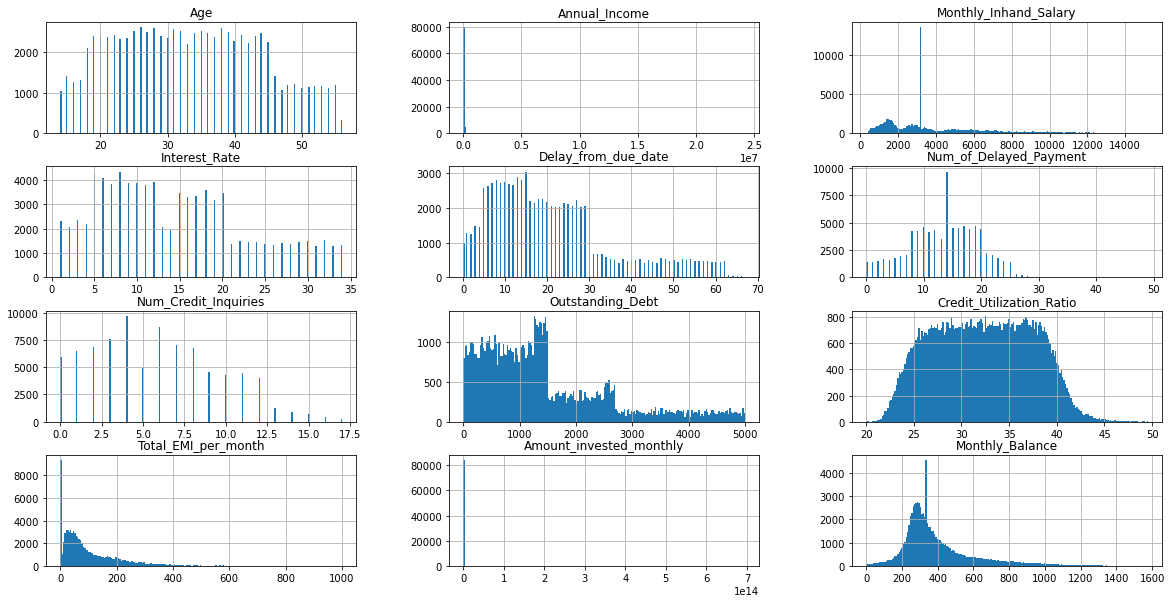

In [163]:
data_cleaned.hist(bins=200,figsize=[20,10])

In [164]:
def pie_plot(data_cleaned, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        data_cleaned[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

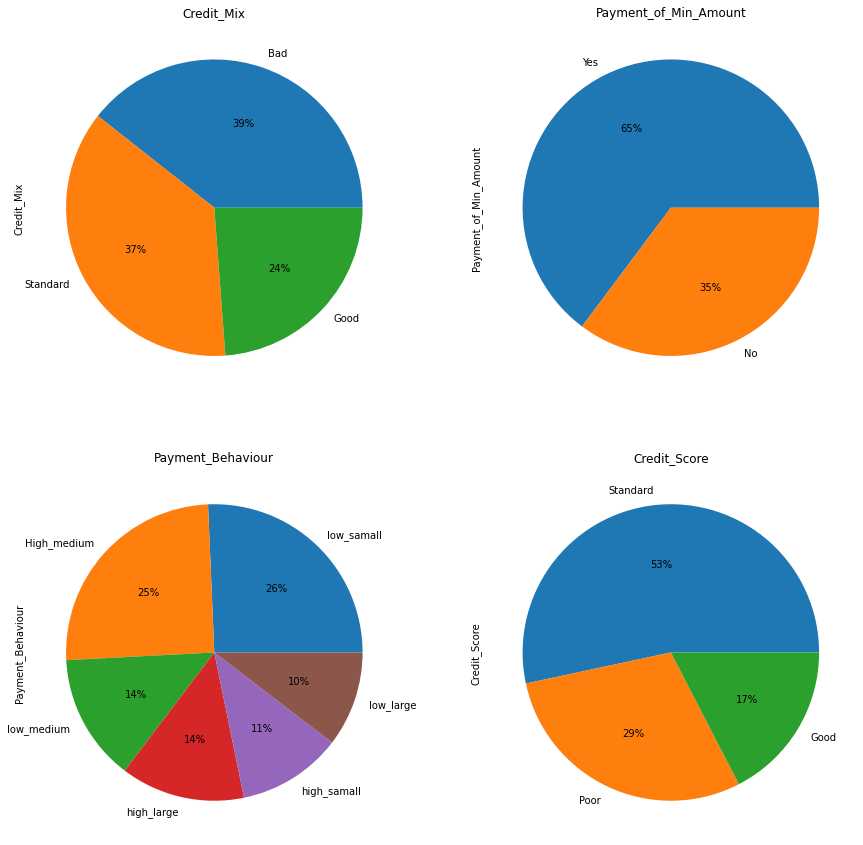

In [165]:
pie_plot(data_cleaned, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

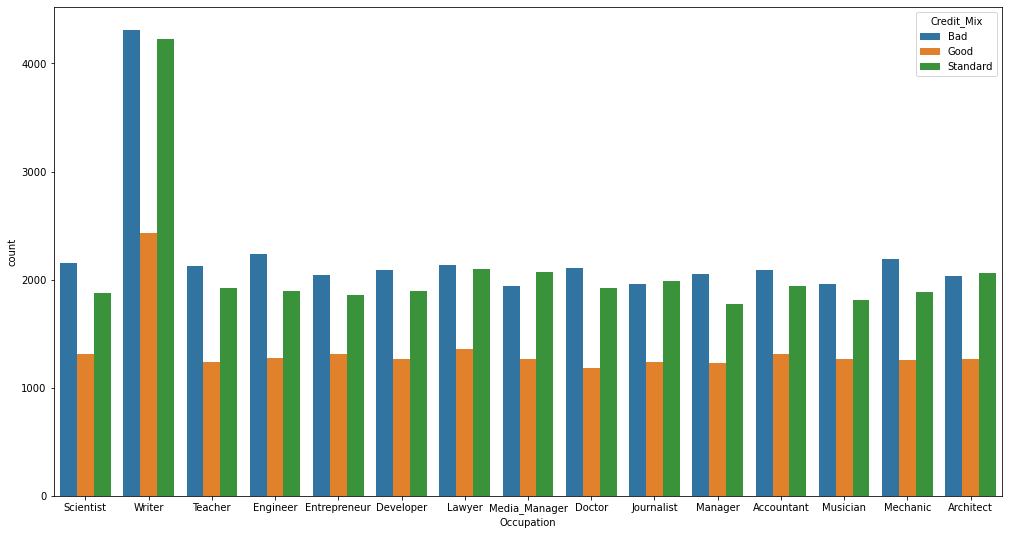

In [166]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=data_cleaned,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

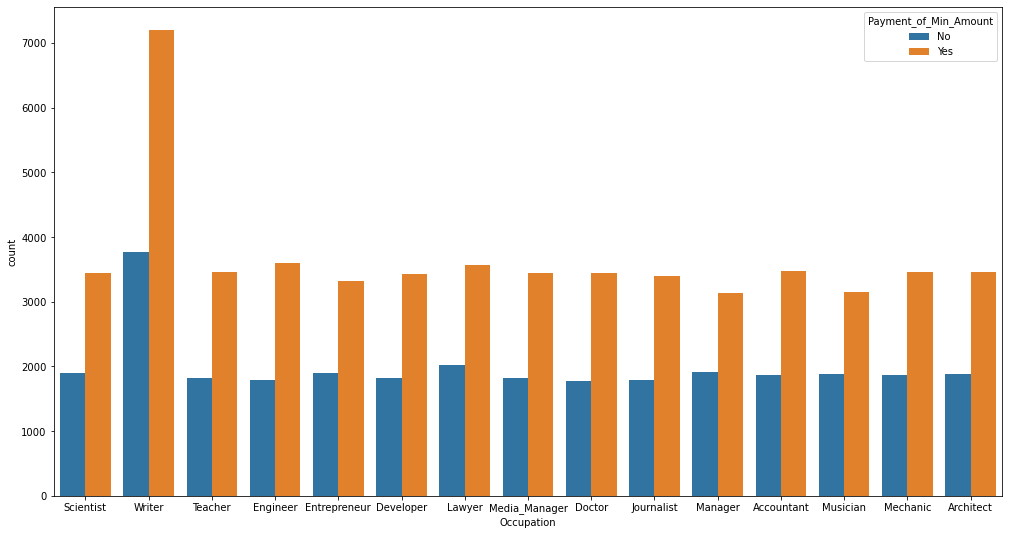

In [167]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=data_cleaned,x="Occupation",hue="Payment_of_Min_Amount")

In [168]:
data_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [169]:
numeric_cols = data_cleaned.select_dtypes(exclude = "object").columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [171]:
vif_df = data_cleaned[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data

,feature,VIF
0,Age,0.852526
1,Annual_Income,1.000852
2,Monthly_Inhand_Salary,2.229933
3,Interest_Rate,2.269415
4,Num_of_Loan,1.876318
5,Delay_from_due_date,1.854874
6,Num_of_Delayed_Payment,1.551882
7,Num_Credit_Inquiries,1.976964
8,Outstanding_Debt,2.170224
9,Credit_Utilization_Ratio,0.481447


<AxesSubplot:>

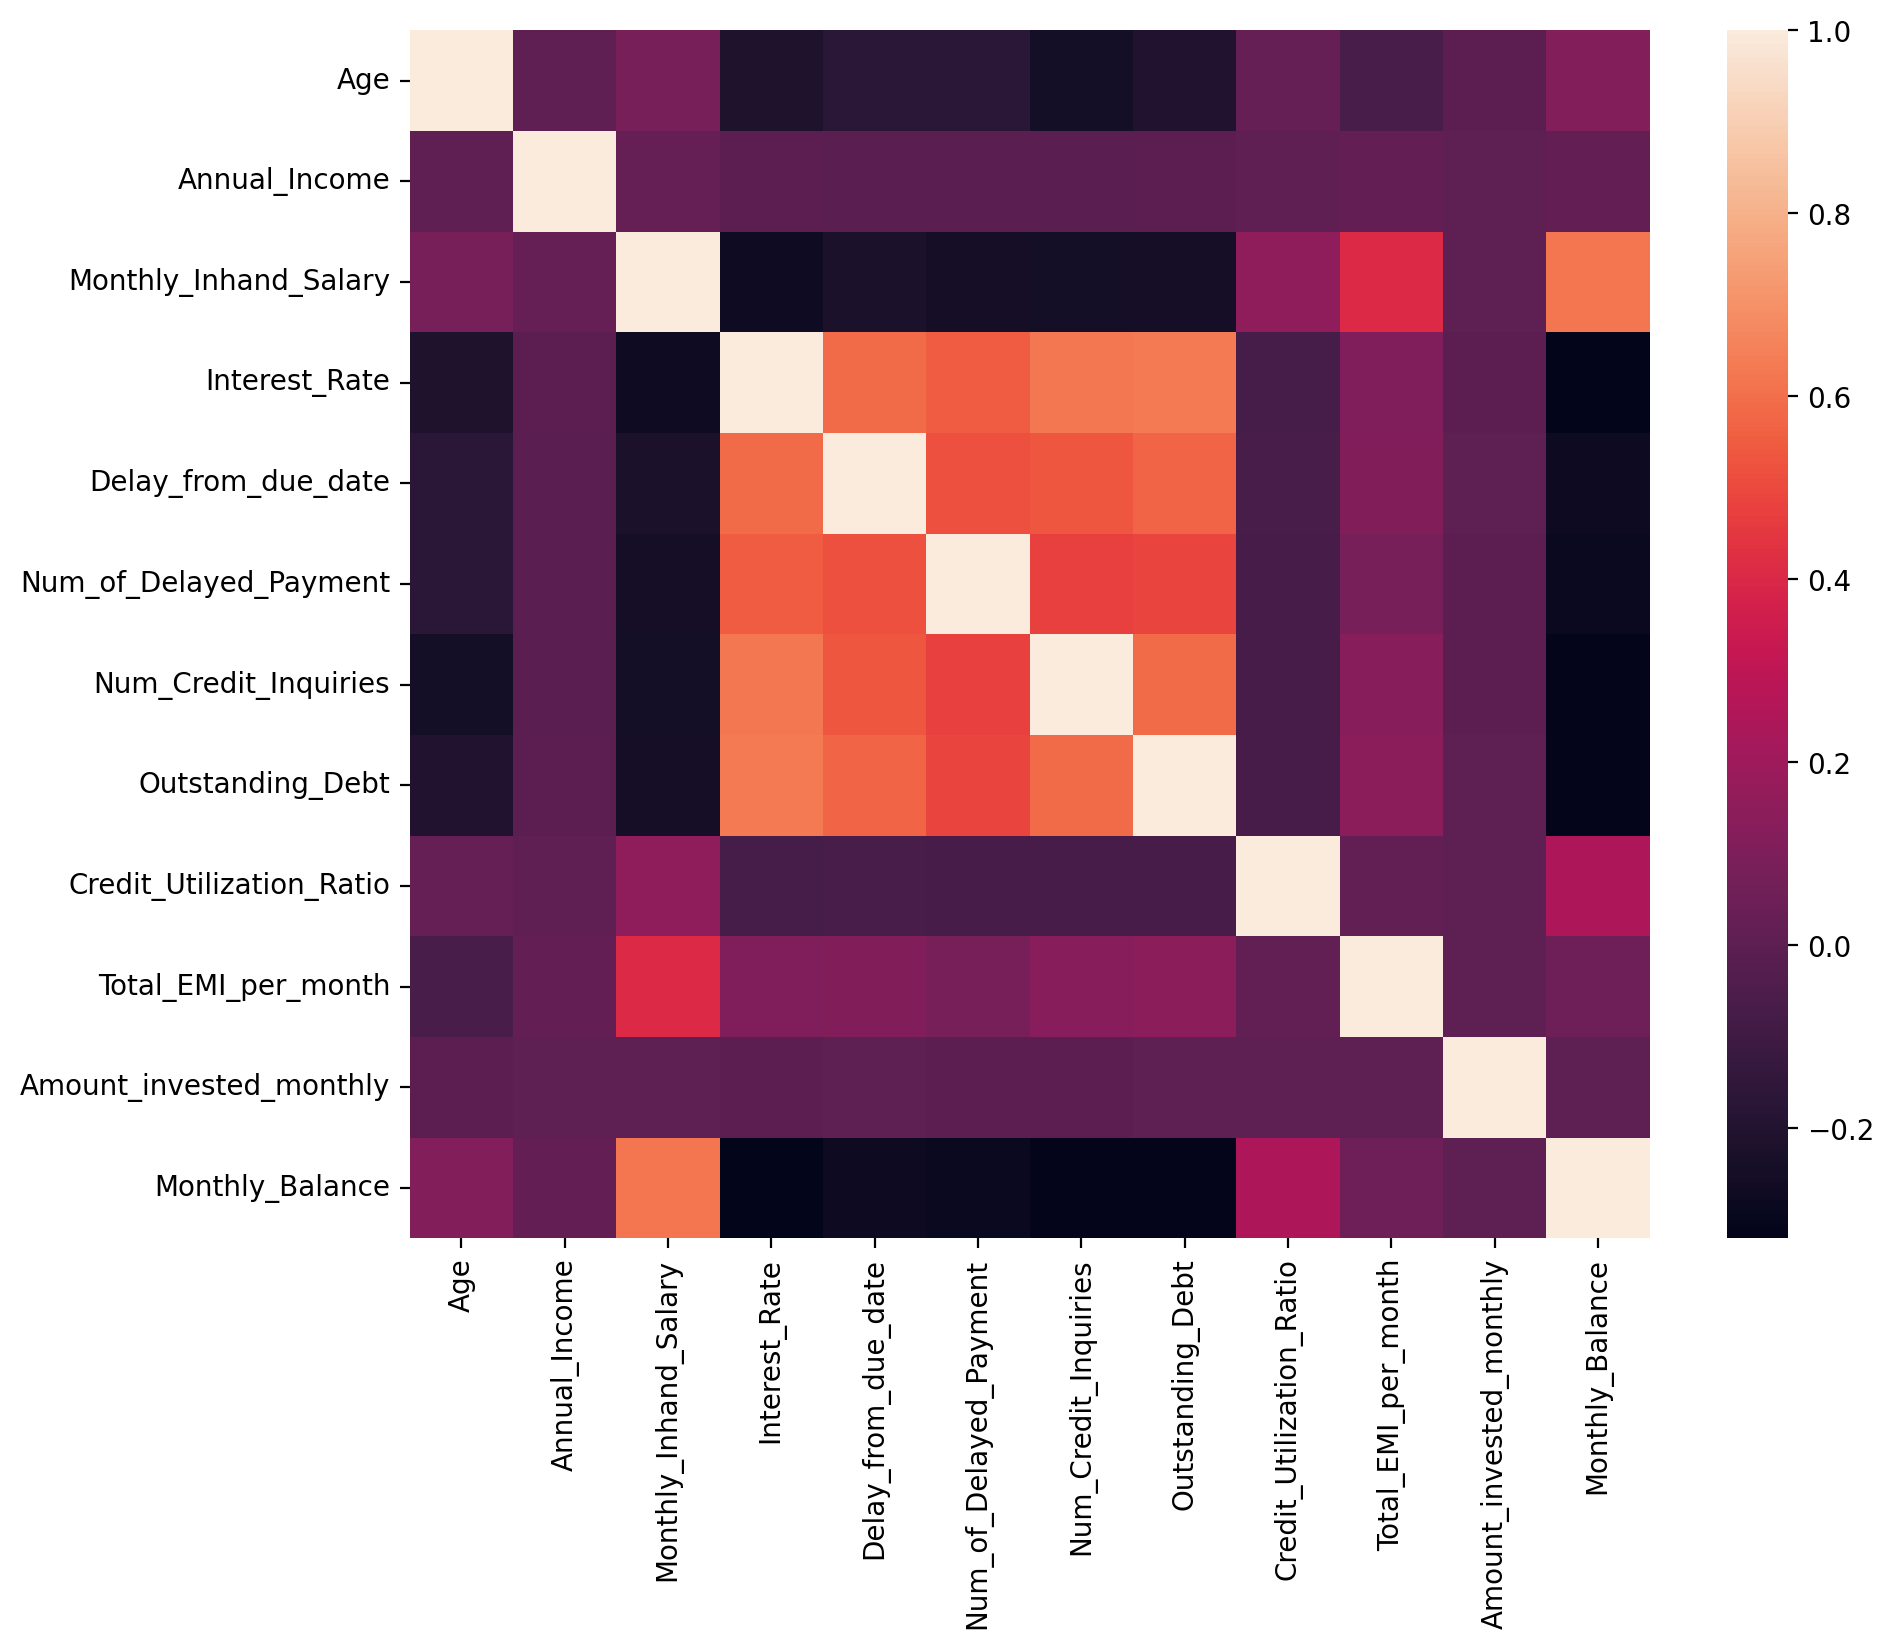

In [172]:
plt.figure(figsize=(10,8) , dpi=200)
sns.heatmap(data_cleaned.corr())

In [173]:
data_cleaned.tail(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99977,49,Writer,37188.10,3097.008333,5,3,7,12,3,Good,620.64,32.803431,No,84.205949,70.869970,high_large,336.023453,Good
99978,49,Writer,37188.10,3182.962420,5,3,4,11,3,Bad,620.64,24.540510,No,84.205949,125.956592,low_medium,336.023453,Good
99979,49,Writer,37188.10,3097.008333,5,3,3,12,3,Good,620.64,36.979007,Yes,84.205949,215.486386,low_samall,336.023453,Good
99980,49,Writer,37188.10,3097.008333,5,3,7,12,3,Bad,620.64,27.495263,No,84.205949,78.497727,High_medium,336.023453,Standard
99981,50,Writer,37188.10,3097.008333,5,3,5,12,3,Good,620.64,37.753013,Yes,84.205949,147.339908,low_samall,336.023453,Good
99982,50,Writer,37188.10,3097.008333,5,3,7,13,3,Good,620.64,38.850680,No,84.205949,82.825572,High_medium,336.023453,Good
99983,50,Writer,37188.10,3097.008333,5,3,7,9,3,Bad,620.64,39.300980,No,84.205949,42.935566,High_medium,336.023453,Good
99984,28,Architect,20002.88,1929.906667,29,5,35,26,9,Bad,3571.70,22.895966,Yes,60.964772,43.370670,high_large,336.023453,Poor
99986,28,Architect,20002.88,1929.906667,29,5,33,25,9,Bad,3571.70,24.713861,Yes,60.964772,76.282793,low_samall,336.023453,Poor
99987,28,Architect,20002.88,1929.906667,29,10,33,25,9,Bad,3571.70,30.614953,Yes,60.964772,43.724617,high_large,336.023453,Standard


In [174]:
data_cleaned["Credit_Mix"]=data_cleaned["Credit_Mix"].map({"Good":0,"Bad":1,"Standard":2})

In [175]:
data_cleaned["Payment_of_Min_Amount"]=data_cleaned["Payment_of_Min_Amount"].map({"Yes":0,"No":1})

In [176]:
data_cleaned["Credit_Score"]=data_cleaned["Credit_Score"].map({"Good":0,"Standard":1, "Poor":2})

In [177]:
data_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,7,4,1,809.98,26.822620,1,49.574949,80.415295,high_samall,312.494089,0
1,23,Scientist,19114.12,3182.962420,3,4,1,14,4,0,809.98,31.944960,1,49.574949,118.280222,low_large,284.629162,0
3,23,Scientist,19114.12,3182.962420,3,4,5,4,4,0,809.98,31.377862,1,49.574949,199.458074,low_samall,223.451310,0
4,23,Scientist,19114.12,1824.843333,3,4,6,14,4,0,809.98,24.797347,1,49.574949,41.420153,High_medium,341.489231,0
5,23,Scientist,19114.12,3182.962420,3,4,8,4,4,0,809.98,27.262259,1,49.574949,62.430172,High_medium,340.479212,0


In [178]:
data_dummies=pd.get_dummies(data_cleaned, drop_first=True)

In [179]:
data_dummies

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,...,Num_of_Loan_17,Num_of_Loan_18,Num_of_Loan_19,Num_of_Loan_23,Num_of_Loan_29,Payment_Behaviour_high_large,Payment_Behaviour_high_samall,Payment_Behaviour_low_large,Payment_Behaviour_low_medium,Payment_Behaviour_low_samall
0,23,19114.12,1824.843333,3,3,7,4,1,809.98,26.822620,...,0,0,0,0,0,0,1,0,0,0
1,23,19114.12,3182.962420,3,1,14,4,0,809.98,31.944960,...,0,0,0,0,0,0,0,1,0,0
3,23,19114.12,3182.962420,3,5,4,4,0,809.98,31.377862,...,0,0,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,3,6,14,4,0,809.98,24.797347,...,0,0,0,0,0,0,0,0,0,0
5,23,19114.12,3182.962420,3,8,4,4,0,809.98,27.262259,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,7,20,6,3,1,502.38,39.323569,...,0,0,0,0,0,0,0,0,0,0
99995,25,39628.99,3359.415833,7,23,7,3,1,502.38,34.663572,...,0,0,0,0,0,1,0,0,0,0
99996,25,39628.99,3359.415833,7,18,7,3,1,502.38,40.565631,...,0,0,0,0,0,0,0,0,0,0
99998,25,39628.99,3359.415833,7,20,14,3,0,502.38,33.638208,...,0,0,0,0,0,0,0,1,0,0


In [180]:
data_preprocessed=data_dummies.copy()

In [181]:
data_preprocessed.shape[0]

84861

In [182]:
index_1=np.arange(1,data_preprocessed.shape[0]+1)

In [183]:
data_preprocessed["index"]=index_1

In [184]:
data_preprocessed=data_preprocessed.set_index(keys=index_1)

In [185]:
data_preprocessed=data_preprocessed.drop("index", axis=1)

In [186]:
data_preprocessed

,Age,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,...,Num_of_Loan_17,Num_of_Loan_18,Num_of_Loan_19,Num_of_Loan_23,Num_of_Loan_29,Payment_Behaviour_high_large,Payment_Behaviour_high_samall,Payment_Behaviour_low_large,Payment_Behaviour_low_medium,Payment_Behaviour_low_samall
1,23,19114.12,1824.843333,3,3,7,4,1,809.98,26.822620,...,0,0,0,0,0,0,1,0,0,0
2,23,19114.12,3182.962420,3,1,14,4,0,809.98,31.944960,...,0,0,0,0,0,0,0,1,0,0
3,23,19114.12,3182.962420,3,5,4,4,0,809.98,31.377862,...,0,0,0,0,0,0,0,0,0,1
4,23,19114.12,1824.843333,3,6,14,4,0,809.98,24.797347,...,0,0,0,0,0,0,0,0,0,0
5,23,19114.12,3182.962420,3,8,4,4,0,809.98,27.262259,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84857,25,39628.99,3359.415833,7,20,6,3,1,502.38,39.323569,...,0,0,0,0,0,0,0,0,0,0
84858,25,39628.99,3359.415833,7,23,7,3,1,502.38,34.663572,...,0,0,0,0,0,1,0,0,0,0
84859,25,39628.99,3359.415833,7,18,7,3,1,502.38,40.565631,...,0,0,0,0,0,0,0,0,0,0
84860,25,39628.99,3359.415833,7,20,14,3,0,502.38,33.638208,...,0,0,0,0,0,0,0,1,0,0


In [187]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84861 entries, 1 to 84861
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            84861 non-null  int32  
 1   Annual_Income                  84861 non-null  float64
 2   Monthly_Inhand_Salary          84861 non-null  float64
 3   Interest_Rate                  84861 non-null  int64  
 4   Delay_from_due_date            84861 non-null  int64  
 5   Num_of_Delayed_Payment         84861 non-null  int32  
 6   Num_Credit_Inquiries           84861 non-null  int32  
 7   Credit_Mix                     84861 non-null  int64  
 8   Outstanding_Debt               84861 non-null  float64
 9   Credit_Utilization_Ratio       84861 non-null  float64
 10  Payment_of_Min_Amount          84861 non-null  int64  
 11  Total_EMI_per_month            84861 non-null  float64
 12  Amount_invested_monthly        84861 non-null 

In [188]:
inputs=data_preprocessed.drop("Credit_Score", axis=1)
target=data_preprocessed["Credit_Score"]

In [189]:
from sklearn.model_selection import train_test_split

x_train ,x_test , y_train , y_test=train_test_split(inputs , target , test_size=0.25 , random_state=42)

In [190]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(multi_class="ovr")
log.fit(x_train , y_train)                                     

log_pred=log.predict(x_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test , log_pred))

[[    0  3647     0]
 [    0 11400     0]
 [    0  6169     0]]


In [192]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,log_pred)

0.5373303167420814

In [193]:
error=1-accuracy_score(y_test,log_pred)
error

0.4626696832579186

# LogisticRegressionCV

In [194]:
from sklearn.linear_model import LogisticRegressionCV

log_cv=LogisticRegressionCV(Cs=5,multi_class="ovr" )
log_cv.fit(x_train, y_train)                                        

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-pac

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-pac

LogisticRegressionCV(Cs=5, multi_class='ovr')

In [195]:
log_cv.Cs_

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [196]:
log_cv.C_

array([0.0001, 0.0001, 0.0001])

In [197]:
log_cv.get_params()

{'Cs': 5,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [198]:
logcv_pred=log_cv.predict(x_test)

In [199]:
accuracy_score(y_test,logcv_pred)

0.5373303167420814

# GridSearchCV

In [200]:
from sklearn.model_selection import GridSearchCV
log_g=LogisticRegression(multi_class="ovr")

param_grid={"C":[0.01 , 0.1 ,1] , "solver":["lbfgs","newton-cg","sag"] }
grid=GridSearchCV(log_g , param_grid, refit=True , verbose=4)
grid.fit(x_train , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.532 total time=   0.7s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.532 total time=   0.7s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algori

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.532 total time=  25.2s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.532 total time=  23.7s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\op

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.532 total time=  25.4s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.532 total time=  25.5s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.532 total time=  27.6s
[CV 1/5] END ................C=0.01, solver=sag;, score=0.532 total time=   5.4s
[CV 2/5] END ................C=0.01, solver=sag;, score=0.532 total time=   4.8s
[CV 3/5] END ................C=0.01, solver=sag;, score=0.532 total time=   6.3s
[CV 4/5] END ................C=0.01, solver=sag;, score=0.532 total time=   5.0s
[CV 5/5] END ................C=0.01, solver=sag;, score=0.532 total time=   6.1s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=0.1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............C=0.1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............C=0.1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=0.1, solver=lbfgs;, score=0.532 total time=   0.6s
[CV 5/5] END ...............C=0.1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 1/5] END ...........C=0.1, solver=newton-cg;, score=0.532 total time=  25.3s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algori

[CV 2/5] END ...........C=0.1, solver=newton-cg;, score=0.532 total time=  22.8s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors preven

[CV 3/5] END ...........C=0.1, solver=newton-cg;, score=0.532 total time=  20.0s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\op

[CV 4/5] END ...........C=0.1, solver=newton-cg;, score=0.532 total time=  22.3s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

[CV 5/5] END ...........C=0.1, solver=newton-cg;, score=0.532 total time=  28.5s
[CV 1/5] END .................C=0.1, solver=sag;, score=0.532 total time=   4.2s
[CV 2/5] END .................C=0.1, solver=sag;, score=0.532 total time=   5.4s
[CV 3/5] END .................C=0.1, solver=sag;, score=0.532 total time=   4.2s
[CV 4/5] END .................C=0.1, solver=sag;, score=0.532 total time=   4.6s
[CV 5/5] END .................C=0.1, solver=sag;, score=0.532 total time=   6.4s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .................C=1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................C=1, solver=lbfgs;, score=0.532 total time=   0.6s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.532 total time=   0.6s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algori

[CV 1/5] END .............C=1, solver=newton-cg;, score=0.532 total time=  20.8s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algori

[CV 2/5] END .............C=1, solver=newton-cg;, score=0.532 total time=  22.2s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\op

[CV 3/5] END .............C=1, solver=newton-cg;, score=0.532 total time=  24.7s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWar

[CV 4/5] END .............C=1, solver=newton-cg;, score=0.532 total time=  22.8s


C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anacond

C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END .............C=1, solver=newton-cg;, score=0.532 total time=  22.4s
[CV 1/5] END ...................C=1, solver=sag;, score=0.532 total time=   5.3s
[CV 2/5] END ...................C=1, solver=sag;, score=0.532 total time=   4.9s
[CV 3/5] END ...................C=1, solver=sag;, score=0.532 total time=   4.6s
[CV 4/5] END ...................C=1, solver=sag;, score=0.532 total time=   5.1s
[CV 5/5] END ...................C=1, solver=sag;, score=0.532 total time=   5.4s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.01, 0.1, 1],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             verbose=4)

In [201]:
grid.best_params_

{'C': 0.01, 'solver': 'lbfgs'}

In [202]:
log_grid_pred=grid.predict(x_test)

In [203]:
accuracy_score(y_test,log_grid_pred)

0.5373303167420814

# DecisionTreeClassifier

In [204]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=42)
param_grid_dtc={"criterion":["gini", "entropy", "log_loss"],"max_features":["auto", "sqrt", "log2"] }
dtc_grid=GridSearchCV(dtc , param_grid_dtc, cv=5,refit=True , verbose=4)
dtc_grid.fit(x_train , y_train)
dtc_grid_pred=dtc_grid.predict(x_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .criterion=gini, max_features=auto;, score=0.631 total time=   0.3s
[CV 2/5] END .criterion=gini, max_features=auto;, score=0.641 total time=   0.3s
[CV 3/5] END .criterion=gini, max_features=auto;, score=0.651 total time=   0.3s
[CV 4/5] END .criterion=gini, max_features=auto;, score=0.642 total time=   0.3s
[CV 5/5] END .criterion=gini, max_features=auto;, score=0.649 total time=   0.3s
[CV 1/5] END .criterion=gini, max_features=sqrt;, score=0.631 total time=   0.3s
[CV 2/5] END .criterion=gini, max_features=sqrt;, score=0.641 total time=   0.3s
[CV 3/5] END .criterion=gini, max_features=sqrt;, score=0.651 total time=   0.3s
[CV 4/5] END .criterion=gini, max_features=sqrt;, score=0.642 total time=   0.3s
[CV 5/5] END .criterion=gini, max_features=sqrt;, score=0.649 total time=   0.3s
[CV 1/5] END .criterion=gini, max_features=log2;, score=0.637 total time=   0.3s
[CV 2/5] END .criterion=gini, max_features=log2;,

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Anaconda\lib\site-packag

In [205]:
dtc_grid.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [206]:
accuracy_score(y_test,dtc_grid_pred)

0.656579939668175

In [207]:
dtc=DecisionTreeClassifier(random_state=42,criterion= 'entropy', max_features= 'auto')
dtc.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

# RandomForestClassifier

In [215]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='entropy', max_features='auto',random_state=42) 
param_grid_dtc={"bootstrap":[True , False],"n_estimators":[50,100,150,200],"oob_score":[True , False]}
rfc_grid=GridSearchCV(rfc , param_grid_dtc, cv=5,refit=True , verbose=4)
rfc_grid.fit(x_train ,y_train)                     

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END bootstrap=True, n_estimators=50, oob_score=True;, score=0.752 total time=  17.4s
[CV 2/5] END bootstrap=True, n_estimators=50, oob_score=True;, score=0.753 total time=  16.6s
[CV 3/5] END bootstrap=True, n_estimators=50, oob_score=True;, score=0.754 total time=  16.3s
[CV 4/5] END bootstrap=True, n_estimators=50, oob_score=True;, score=0.753 total time=  16.3s
[CV 5/5] END bootstrap=True, n_estimators=50, oob_score=True;, score=0.752 total time=  16.4s
[CV 1/5] END bootstrap=True, n_estimators=50, oob_score=False;, score=0.752 total time=  15.4s
[CV 2/5] END bootstrap=True, n_estimators=50, oob_score=False;, score=0.753 total time=  15.4s
[CV 3/5] END bootstrap=True, n_estimators=50, oob_score=False;, score=0.754 total time=  15.2s
[CV 4/5] END bootstrap=True, n_estimators=50, oob_score=False;, score=0.753 total time=  15.4s
[CV 5/5] END bootstrap=True, n_estimators=50, oob_score=False;, score=0.752 total time=  

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [50, 100, 150, 200],
                         'oob_score': [True, False]},
             verbose=4)

In [216]:
rfc_grid.best_params_

{'bootstrap': False, 'n_estimators': 150, 'oob_score': False}

In [217]:
rfc_pred=rfc_grid.predict(x_test)

In [223]:
accuracy_score(y_test,rfc_pred)

0.7835595776772247